## Actividad 8

In [1]:
import numpy as np
from astropy.table import Table
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import Curves2D
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from astropy.table import Table
import matplotlib.ticker as ticker
from scipy import interpolate

In [2]:
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307)

In [3]:
# Tiempos
tiempo = cosmo.age(0.87).value
print(tiempo)   

6.448664295616842


In [4]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 07/' 
# path_win =

In [5]:
path_lin_fig = '/home/ramiro/Facultad/Tesis/Figuras/Actividad 08/'

In [6]:
table  = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat')
Ref    = table[(table['Stars_Mass']>=1e10)&(table['SF_Mass']>0)].copy()
Ref

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Hydrogen,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.727174,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.696796,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.714222,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14
24,14957972,28000000000002,28,2.220446e-16,5,6.932319,35.628769,56.786160,5.408647e+10,2.563663e+09,...,0.734066,0.003858,0.008299,1.392074,9.234837,30,4.320196e+10,0.999526,1411.312012,3.002119e+14
25,21573586,28000000000002,28,2.220446e-16,0,8.865488,35.284275,54.431995,1.665042e+12,3.504242e+10,...,0.744971,0.001391,0.003191,18.168200,9.314658,30,2.890146e+11,0.852622,1411.312012,3.002119e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.740806,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.741599,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.743705,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.737761,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11


In [7]:
SF_O  = Ref['SF_Oxygen']
SF_H  = Ref['SF_Hydrogen']
SF_M  = Ref['SF_Mass']
M_Star= Ref['Stars_Mass']

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

Ref['sf_metalicity'] = 12 + np.log10(M_O_SF/(16*M_H_SF))
Ref

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200,sf_metalicity
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14,9.079824
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14,9.246274
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14,9.050028
24,14957972,28000000000002,28,2.220446e-16,5,6.932319,35.628769,56.786160,5.408647e+10,2.563663e+09,...,0.003858,0.008299,1.392074,9.234837,30,4.320196e+10,0.999526,1411.312012,3.002119e+14,9.087593
25,21573586,28000000000002,28,2.220446e-16,0,8.865488,35.284275,54.431995,1.665042e+12,3.504242e+10,...,0.001391,0.003191,18.168200,9.314658,30,2.890146e+11,0.852622,1411.312012,3.002119e+14,9.020433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11,9.085429
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11,9.024783
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11,9.286851
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11,9.115270


In [8]:
merger = pd.read_csv(path_lin+'Actividad_7(data_level_merge).dat')
merger

,GalaxyID_test,GroupID_test,snap_lm,z_lm,L_lm,snap_lmm,z_lmm,L_lmm
0,9498012,28000000000002,22.0,6.151898e-01,1.369978,22.0,0.615190,1.369978
1,9508202,28000000000002,26.0,1.827099e-01,1.000422,19.0,1.004122,1.325826
2,9512113,28000000000002,28.0,2.220446e-16,1.002306,24.0,0.365669,1.545269
3,9517736,28000000000002,28.0,2.220446e-16,1.147535,NaN,NaN,NaN
4,9519365,28000000000002,25.0,2.709011e-01,1.008288,5.0,7.049566,3.614620
...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,28.0,2.220446e-16,1.007574,11.0,3.527977,1.465920
3634,10859653,28000000002570,28.0,2.220446e-16,1.004723,12.0,3.016505,1.357690
3635,11104654,28000000002905,25.0,2.709011e-01,1.007583,NaN,NaN,NaN
3636,11247394,28000000003127,28.0,2.220446e-16,1.008742,NaN,NaN,NaN


In [9]:
DF = pd.merge(left= Ref,right=merger, left_on='GalaxyID', right_on='GalaxyID_test')
DF

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,Group_M_Crit200,sf_metalicity,GalaxyID_test,GroupID_test,snap_lm,z_lm,L_lm,snap_lmm,z_lmm,L_lmm
0,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,3.002119e+14,9.079824,9508202,28000000000002,26.0,1.827099e-01,1.000422,19.0,1.004122,1.325826
1,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,3.002119e+14,9.246274,9512113,28000000000002,28.0,2.220446e-16,1.002306,24.0,0.365669,1.545269
2,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,3.002119e+14,9.050028,9517736,28000000000002,28.0,2.220446e-16,1.147535,NaN,NaN,NaN
3,14957972,28000000000002,28,2.220446e-16,5,6.932319,35.628769,56.786160,5.408647e+10,2.563663e+09,...,3.002119e+14,9.087593,14957972,28000000000002,28.0,2.220446e-16,1.002147,9.0,4.485214,1.950383
4,21573586,28000000000002,28,2.220446e-16,0,8.865488,35.284275,54.431995,1.665042e+12,3.504242e+10,...,3.002119e+14,9.020433,21573586,28000000000002,28.0,2.220446e-16,1.031758,13.0,2.478413,2.355971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,6.129222e+11,9.085429,10365607,28000000002202,28.0,2.220446e-16,1.007574,11.0,3.527977,1.465920
3089,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,5.124048e+11,9.024783,10859653,28000000002570,28.0,2.220446e-16,1.004723,12.0,3.016505,1.357690
3090,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,4.354551e+11,9.286851,11104654,28000000002905,25.0,2.709011e-01,1.007583,NaN,NaN,NaN
3091,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,3.759434e+11,9.115270,11247394,28000000003127,28.0,2.220446e-16,1.008742,NaN,NaN,NaN


In [10]:
df = DF.copy()#(DF['L_lm']<3)&(DF['L_lmm']<3)&(DF['L_lm']>1)

In [11]:
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307)

In [12]:
df['t_lm']  = cosmo.age(df['z_lm']).value
df['t_lmm'] = cosmo.age(df['z_lmm']).value

In [13]:
df[(df['GalaxyID']==10857865)]

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,GalaxyID_test,GroupID_test,snap_lm,z_lm,L_lm,snap_lmm,z_lmm,L_lmm,t_lm,t_lmm
1281,10857865,28000000002568,28,2.220446e-16,0,40.664055,68.367599,4.403984,1.249996e+10,1.748441e+09,...,10857865,28000000002568,28.0,2.220446e-16,1.31561,4.0,8.074616,2.460651,13.82053,0.634728


## Graficar 12+log10(O/H) vs log10(Mstar) (scatter plot + medianas + percentiles 25th y 75th).

In [14]:
mask = (df['sf_metalicity'].notna())
xvar = np.log10(df['Stars_Mass'])[mask].to_numpy()
yvar = df['sf_metalicity'][mask].to_numpy()

In [15]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

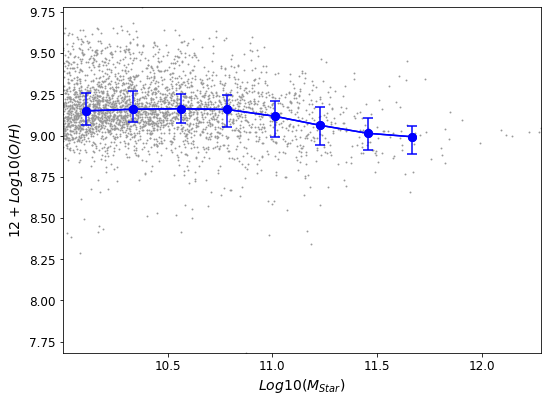

In [16]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(xvar),max(xvar))
ylim=(min(yvar),max(yvar))

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# ax.add_artist(leg1)
# plt.savefig(path_lin_fig+'scatter_log(M)vs_metalicidad.png')


plt.show()

## Scatter coloreados según los parámetros calculados en la actividad 7(L_lm, L_lmm, z_lm, z_lmm_, etc).

## Gráficos para Z_lm:

In [84]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [85]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='z_lm'
colors_var_label=r'$z_{lm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-85-0f228b0f346e>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


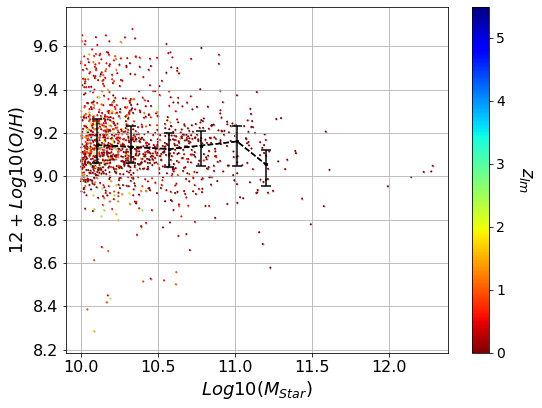

In [24]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig(path_lin_fig+'metalicidad(z_lm).png')
plt.show()

**Para plotly z_lm:**

## Z_lmm:

In [190]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='z_lmm'
colors_var_label=r'$z_{lmm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-190-805fa43144f7>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


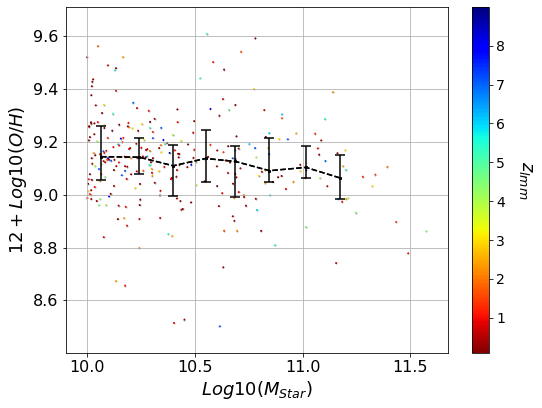

In [191]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig(path_lin_fig+'metalicidad(z_lmm).png')
plt.show()

**Para plotly z_lmm:**

## L_lm:

In [25]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='L_lm'
colors_var_label=r'$L_{lm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-25-09bcaa25d55b>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


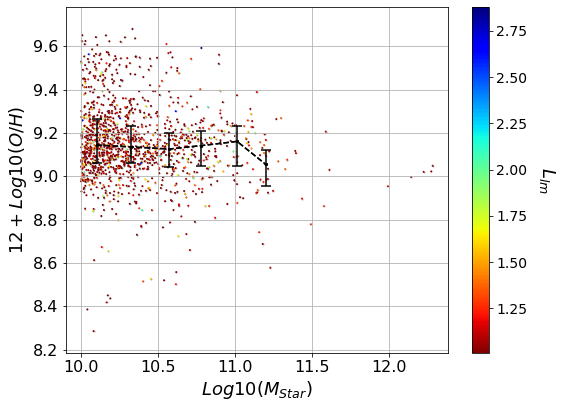

In [26]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig(path_lin_fig+'metalicidad(L_lm).png')
plt.show()

**Para plotly:**

## L_lmm:

In [194]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='L_lmm'
colors_var_label=r'$L_{lmm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-194-a12838181b15>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


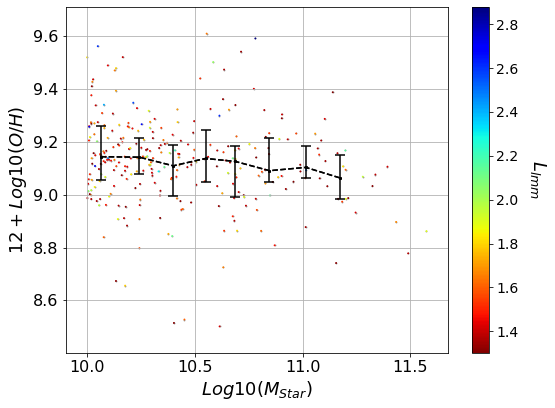

In [195]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig(path_lin_fig+'metalicidad(L_lmm).png')
plt.show()

## t_lm:

In [196]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='t_lm'
colors_var_label=r'$t_{lm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-196-06c5febcd61f>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


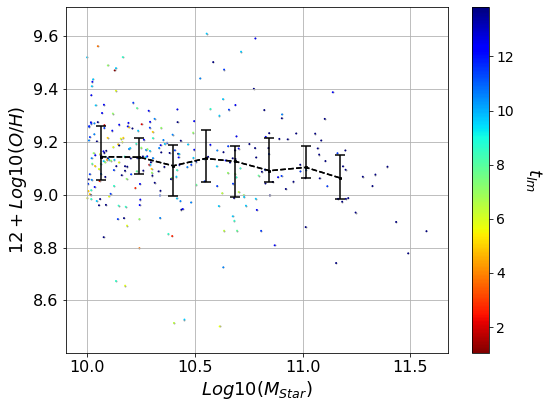

In [197]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig(path_lin_fig+'metalicidad(t_lm).png')
plt.show()

**Para plotly:**

## t_lmm:

In [23]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='t_lmm'
colors_var_label=r'$t_{lmm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-23-79aa1b5e15e2>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


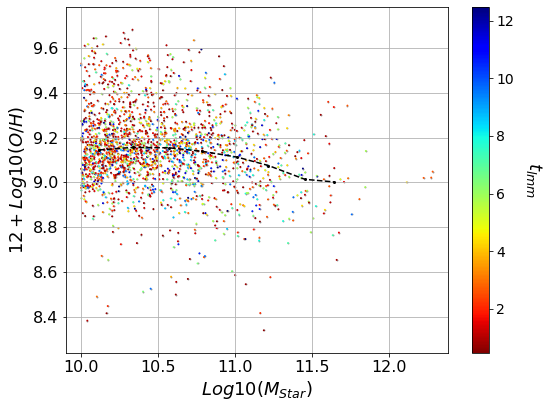

In [24]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

# ax.errorbar(xmedian,ymedian,yerr=yerror,
#            c='k',marker='o',markersize=2,linestyle='--',
#            linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig(path_lin_fig+'metalicidad(t_lmm).png')
plt.show()

**Para plotly:**

## snap_lm:

In [27]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='snap_lm'
colors_var_label=r'$snap_{lm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-27-3aa9aed37712>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


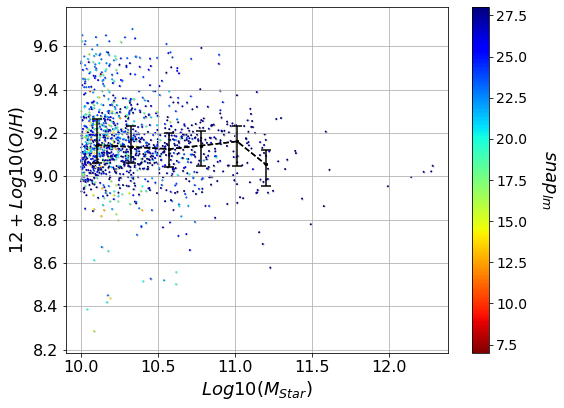

In [28]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig(path_lin_fig+'metalicidad(snap_lm).png')
plt.show()

**Para plotly:**

## snap_lmm:

In [29]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='snap_lmm'
colors_var_label=r'$snap_{lmm}$'
colors_var= df[colors_var_key][mask]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-29-d537d1d626d1>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo


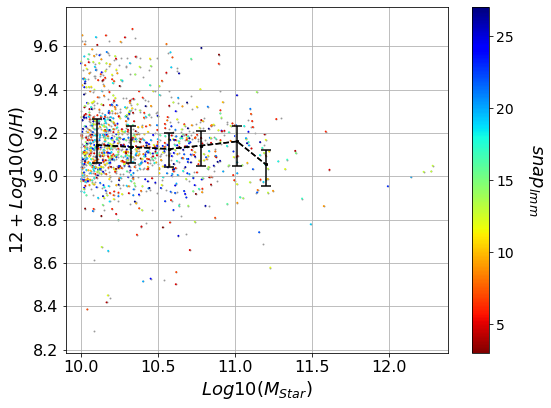

In [30]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='k',marker='o',ms=2,linestyle='--',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='--',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig(path_lin_fig+'metalicidad(snap_lmm).png')
plt.show()

In [15]:
del colors

NameError: name 'colors' is not defined

# Color maps para los parametros

**Tranformamos el dataframe en Table de astropy**

## t_lm:

In [15]:
from matplotlib import colors

In [16]:
astro_merge = Table(data=np.array(df),names=df.keys())

In [17]:
# Condiciones para seleccionar muestra
mask=(astro_merge['L_lm']>1.01)&(astro_merge['L_lm']<3)&(astro_merge['z_lm']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [18]:
# Parámetro que colorea
parametro= 't_lm'

In [19]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [20]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$t_{lm}$'

# Número de bines en cada eje
nbinsx=20
nbinsy=35
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-21-7ab5bb80a011>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


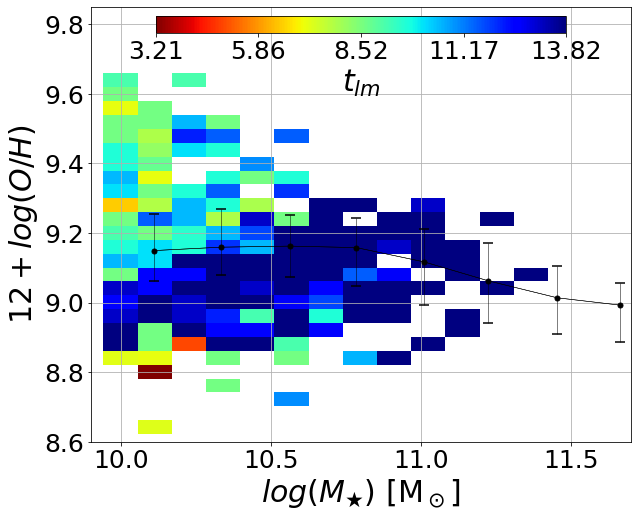

In [21]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## t_lmm:

In [22]:
# Condiciones para seleccionar muestra
mask=(astro_merge['L_lmm']<10)&(astro_merge['L_lmm']>1.01)&(astro_merge['z_lmm']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [23]:
# Parámetro que colorea
parametro= 't_lmm'

In [24]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [25]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$t_{lmm}$'

# Número de bines en cada eje
nbinsx=10
nbinsy=17
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-26-7ab5bb80a011>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


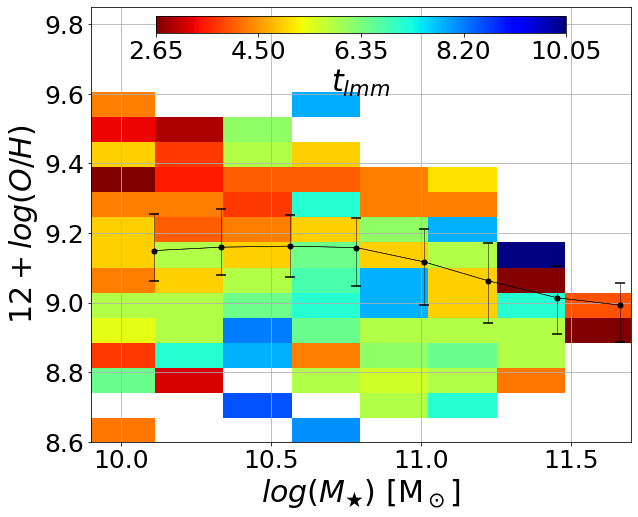

In [26]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

In [27]:
len(xplot)

1304

## Z_lm:

In [126]:
# Condiciones para seleccionar muestra
mask=(astro_merge['L_lm']<100)&(astro_merge['L_lm']>1.01)&(astro_merge['z_lm']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [127]:
# Parámetro que colorea
parametro= 'z_lm'

In [128]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [129]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$z_{lm}$'

# Número de bines en cada eje
nbinsx=15
nbinsy=20
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-130-7ab5bb80a011>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


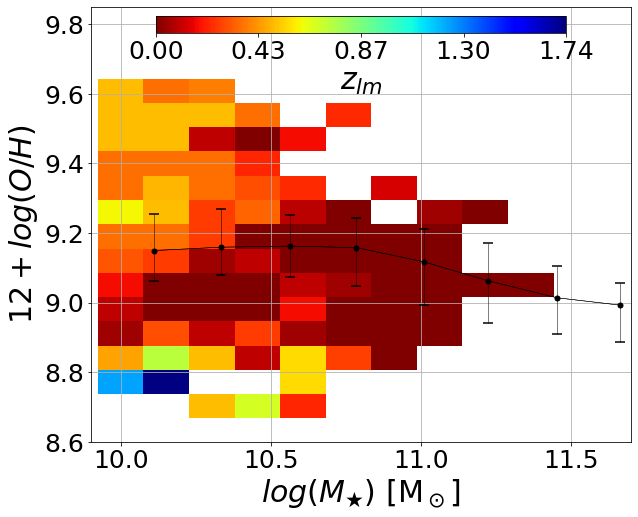

In [130]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## L_lm:

In [121]:
# Condiciones para seleccionar muestra
mask=(astro_merge['L_lm']<5)&(astro_merge['L_lm']>1.01)&(astro_merge['z_lm']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [122]:
# Parámetro que colorea
parametro= 'L_lm'

In [123]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [124]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$L_{lm}$'

# Número de bines en cada eje
nbinsx=15
nbinsy=20
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-125-7ab5bb80a011>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


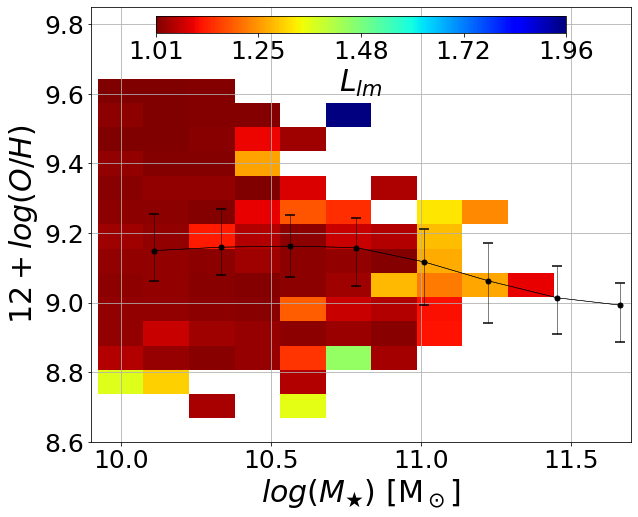

In [125]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## Z_lmm:

In [116]:
# Condiciones para seleccionar muestra
mask=(astro_merge['L_lmm']<3)&(astro_merge['L_lmm']>1.01)&(astro_merge['z_lmm']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [117]:
# Parámetro que colorea
parametro= 'z_lmm'

In [118]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [119]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$z_{lmm}$'

# Número de bines en cada eje
nbinsx=15
nbinsy=20
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=3

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-120-7ab5bb80a011>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


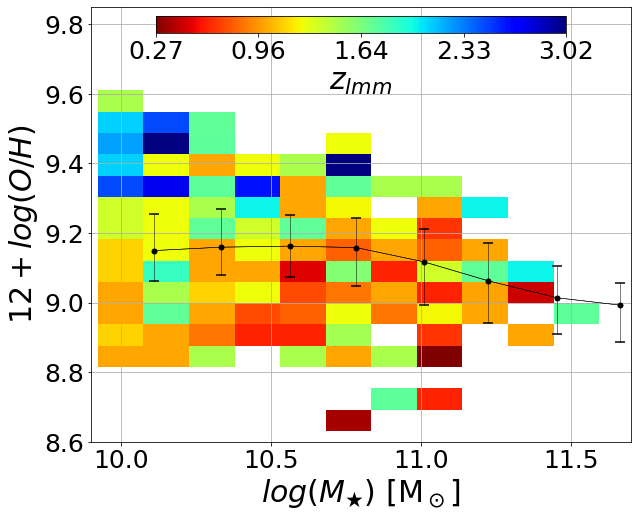

In [120]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## L_lmm:

In [111]:
# Condiciones para seleccionar muestra
mask=(astro_merge['L_lmm']<3)&(astro_merge['L_lmm']>1.01)&(astro_merge['z_lmm']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [112]:
# Parámetro que colorea
parametro= 'L_lmm'

In [113]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [114]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$L_{lmm}$'

# Número de bines en cada eje
nbinsx=15
nbinsy=20
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=3

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-115-48b5a4452c8a>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


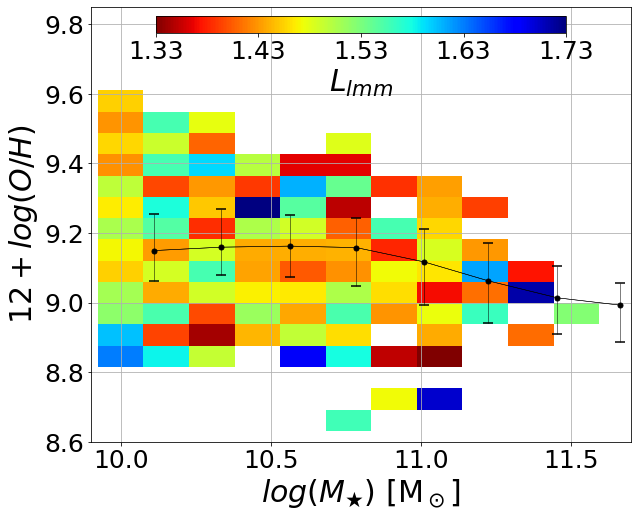

In [115]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)


plt.grid(True)
plt.subplots_adjust(left=0.15)


# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## snap_lm:

In [143]:
# Condiciones para seleccionar muestra
mask=(astro_merge['L_lm']<3)&(astro_merge['L_lm']>1.01)&(astro_merge['snap_lm']>=12)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [144]:
# Parámetro que colorea
parametro= 'snap_lm'

In [145]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [146]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$Snap_{lm}$'

# Número de bines en cada eje
nbinsx=25
nbinsy=30
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-147-7ab5bb80a011>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


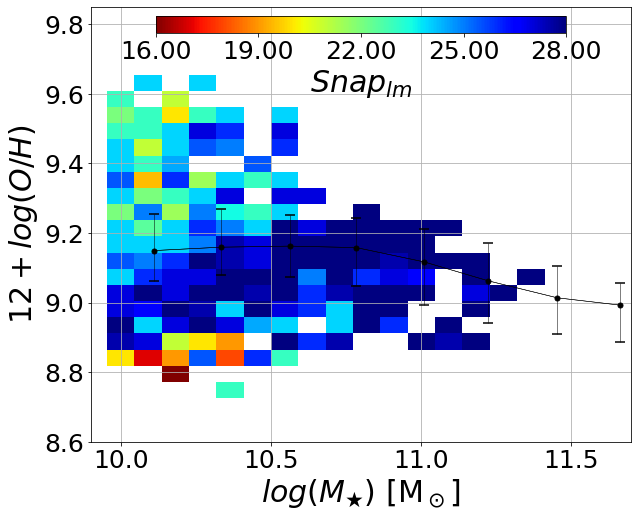

In [147]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

## snap_lmm:

In [138]:
# Condiciones para seleccionar muestra
mask=(astro_merge['L_lmm']<3)&(astro_merge['L_lmm']>1.01)&(astro_merge['snap_lmm']>=12)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [139]:
# Parámetro que colorea
parametro= 'snap_lmm'

In [140]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [141]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$Snap_{lmm}$'

# Número de bines en cada eje
nbinsx=25
nbinsy=30
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=3

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-142-7ab5bb80a011>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


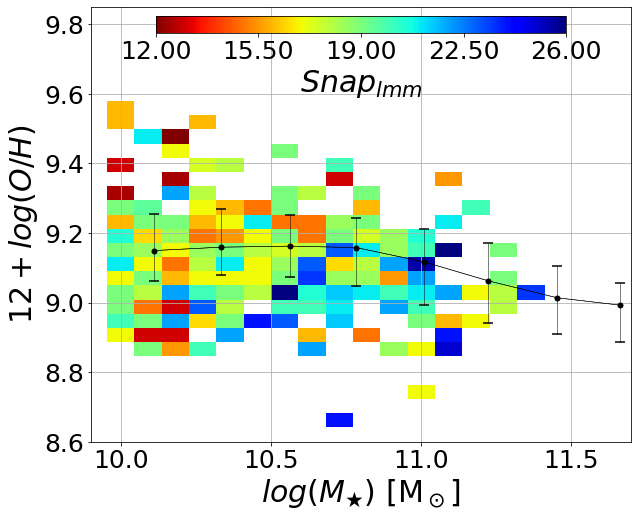

In [142]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

**Scatter de residuos**

   Separar a toda la muestra de galaxias en 3 submuestras con la misma cantidad de galaxias.  Para hacer esto, se pueden usar como cortes los percentiles 33 y 66 de N_2.  Ver la rutina “numpy.percentile”.

   ​​Para cada una de estas submuestras, calcular, como siempre, la MZR mediana con barras de error.

   ​​Graficar en la misma figura las 3 curvas indicadas en 2).

​​

In [87]:
parametro = 't_lm'

In [88]:
mask_notna = (df[parametro].notna())
per = np.percentile(df[parametro][mask_notna],[33.3,66.6])
per

array([ 9.69806995, 13.8205298 ])

In [89]:
mask = [0.0,0.0,0.0]
mask[0] = (df[parametro]<=per[0])&(df['sf_metalicity'].notna())&(df[parametro].notna())
mask[1] = (df[parametro]>per[0])&(df[parametro]<=per[1])&(df['sf_metalicity'].notna())&(df[parametro].notna())
mask[2] = (df[parametro]>per[1])&(df['sf_metalicity'].notna())&(df[parametro].notna())

In [90]:
color=['b','k','r']

In [92]:
xvar    = []
yvar    = []
xmedian = []
ymedian = []
xerror  = []
yerror  = []
elements= []
ax      = []

for i in np.arange(len(mask)):

    xvar.append(np.log10(df['Stars_Mass'])[mask[i]].to_numpy())
    yvar.append(df['sf_metalicity'][mask[i]].to_numpy())

    nbins=10            # Numero de bins en variable x a usar para dividir la muestra
    perc_low=25.        # Percentil a usar como cota inferior de error
    perc_high=75.       # Percentil a usar como cota superior de error
    min_count=10        # Mínima cantidad de elementos para considerar en un bin

    xmedia,ymedia,xerro,yerro,element = Curves2D.median_curve(xvar[i],yvar[i],bins=nbins,min_count=min_count,
                                                              perc_low=perc_low,perc_high=perc_high)
    xmedian.append(xmedia)
    ymedian.append(ymedia)
    xerror.append(xerro)
    yerror.append(yerro)
    elements.append(element)

ValueError: zero-size array to reduction operation minimum which has no identity

IndexError: list index out of range

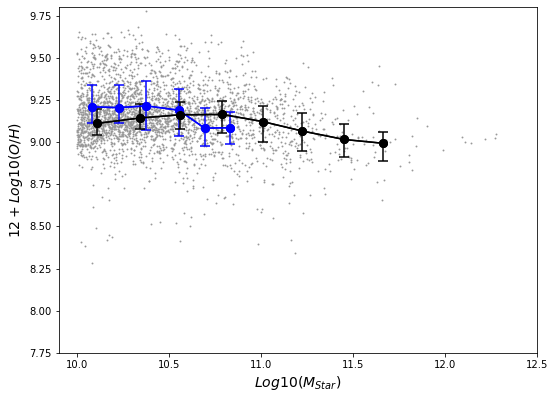

In [99]:
fig,ax=plt.subplots(figsize=(8,6))


xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'
    
xmin,xmax=9.9,12.5
ax.set_xlim(xmin,xmax)

ymin,ymax=7.75,9.8
ax.set_ylim(ymin,ymax)
 
ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)


for i in np.arange(len(mask)):
    
    ax.scatter(xvar[i],yvar[i],marker='o',s=0.8,c='0.6',label='Scatter plot')

    ax.plot(xmedian[i],ymedian[i],c=color[i],marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

    ax.errorbar(xmedian[i],ymedian[i],yerr=yerror[i],
                  c=color[i],marker='o',markersize=8,linestyle='-',
                      linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)


    
# leg1=ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=12)
ax.set_title(r'Medias de '+str(parametro)+' para percentiles .33 (azul),.66(negro),.99(rojo)')


# ax.add_artist(leg1)
# plt.savefig(path_lin_fig+'scatter_log(M)vs_metalicidad_(medianas_'+str(parametro)+').png')

plt.show()

# Scatter para galaxias según last time merger  

In [130]:
mask = (df['sf_metalicity'].notna())
xvar = np.log10(df['Stars_Mass'])[mask].to_numpy()
yvar = df['sf_metalicity'][mask].to_numpy()
print(len(xvar))

3093


In [94]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

In [95]:
mask = (df['sf_metalicity'].notna())&(df['t_lm']<max(df['t_lm'])-4)&(df['t_lm']>max(df['t_lm'])-6)#&(df['t_lmm'].isna())
xvar_1 = np.log10(df['Stars_Mass'])[mask].to_numpy()
yvar_1 = df['sf_metalicity'][mask].to_numpy()
print(len(xvar_1))

511


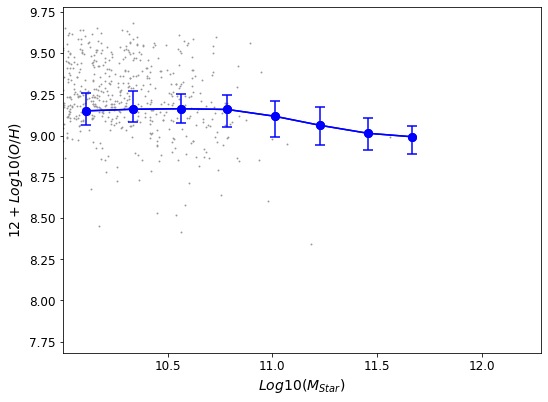

In [96]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(xvar),max(xvar))
ylim=(min(yvar),max(yvar))

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar_1,yvar_1,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# ax.add_artist(leg1)
# plt.savefig(path_lin_fig+'scatter_log(M)vs_metalicidad.png')


plt.show()

In [14]:
# Fin